# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Avaliação</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [1]:
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo. O documento contendo a string com o maior número de caracteres é:

a) gr7<br>
<font color='red'>b) au2</font> <br>
c) ch5<br>
d) au8

In [2]:
files = glob.glob("DocCol2/*")

# Criando dicionário para guardar cada documento nas chaves e a string nos valores
docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split('\\')[-1]
        docs[key] = f.read() 
        
print(docs.keys())

dict_keys(['au1', 'au10', 'au11', 'au12', 'au13', 'au14', 'au15', 'au2', 'au3', 'au4', 'au5', 'au6', 'au7', 'au8', 'au9', 'ch1', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch2', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch3', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch4', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch5', 'ch50', 'ch6', 'ch7', 'ch8', 'ch9', 'gr1', 'gr10', 'gr11', 'gr12', 'gr13', 'gr14', 'gr15', 'gr16', 'gr17', 'gr18', 'gr19', 'gr2', 'gr20', 'gr21', 'gr22', 'gr23', 'gr24', 'gr25', 'gr26', 'gr3', 'gr4', 'gr5', 'gr6', 'gr7', 'gr8', 'gr9'])


In [3]:
# Criando dicionário para computar o número de caracteres de cada documento
tamanho_string = {}

for k,v in docs.items():
    tamanho_string[k] = len(v)

# Procurando a maior string
maior_string = 0
chave_maior_string = ''

for k,v in tamanho_string.items():
    if v > maior_string:
        maior_string = v
        chave_maior_string = k

print('Arquivo com a maior string:', chave_maior_string)
print('Número de caracteres da maior string:', maior_string)

Arquivo com a maior string: au2
Número de caracteres da maior string: 11672


In [4]:
# Solução alternativa
aux_e1 = (
    pd.DataFrame.
    from_dict(docs, orient = 'index', columns = ['text']).
    assign(
        text_lenght = lambda x: x['text'].str.len()
    ).
    sort_values('text_lenght', ascending = False)
        )
aux_e1

,text,text_lenght
au2,From: welty@cabot.balltown.cma.COM (richard we...,11672
au5,From: CPKJP@vm.cc.latech.edu (Kevin Parker)\nS...,9693
au14,From: eliot@engr.washington.edu (eliot)\nSubje...,9351
ch37,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,9279
gr23,From: lilley@v5.cgu.mcc.ac.uk (Chris Lilley)\n...,9261
...,...,...
au4,From: welty@cabot.balltown.cma.COM (richard we...,4780
gr6,From: edb@dmssyd.syd.dms.CSIRO.AU (Ed Breen)\n...,4669
gr15,From: gorgen@ann-arbor.applicon.slb.com (David...,4661
au10,From: shantanu@risc.sps.mot.com (Shantanu Gang...,4617


### Exercício 2)
Crie um dicionário chamado `docsXwords` onde as chaves são os nomes dos arquivos e os valores são as listas de palavras do documento correspondente. As palavras em cada uma das listas devem ser constituídas apenas por letras do alfabeto, estarem lexicamente normalizadas e conterem mais que 1 caracter. Qual o documento cuja lista de palavras  resultante possui o **maior** número de palavras (lexicamente normalizadas) repetidas:

a) gr22<br>
<font color='red'>b) ch30</font><br>
c) au1<br>
d) au8

In [56]:
# Criando dicionário docsXwords com keys=nomes dos arquivos e Values=listas das palavras
docsXwords = {}

for k,v in docs.items():
    words = nltk.word_tokenize(v)                        # tokenizando e criando lista de palavras
    words = [w.lower() for w in words if w.isalpha() and len(w) != 1] # remove símbolos e 1 letra
#     words = [w for w in words if w not in stop_words]    # remove stopwords
    words = [PorterStemmer().stem(w) for w in words]     # stemming (normalização léxica) as repetidas
    docsXwords[k] = words
docsXwords.keys()

dict_keys(['au1', 'au10', 'au11', 'au12', 'au13', 'au14', 'au15', 'au2', 'au3', 'au4', 'au5', 'au6', 'au7', 'au8', 'au9', 'ch1', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch2', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch3', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch4', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch5', 'ch50', 'ch6', 'ch7', 'ch8', 'ch9', 'gr1', 'gr10', 'gr11', 'gr12', 'gr13', 'gr14', 'gr15', 'gr16', 'gr17', 'gr18', 'gr19', 'gr2', 'gr20', 'gr21', 'gr22', 'gr23', 'gr24', 'gr25', 'gr26', 'gr3', 'gr4', 'gr5', 'gr6', 'gr7', 'gr8', 'gr9'])

In [6]:
# Criando dicionário com a contagem da quantidade de palavras repetidas por documento
dpalavras_repetidas = {}
for k,v in docsXwords.items():
    palavras_totais = len(v)
    palavras_nao_repetidas = len(list(set(v)))
    dpalavras_repetidas[k] = palavras_totais - palavras_nao_repetidas 
dpalavras_repetidas    

{'au1': 449,
 'au10': 365,
 'au11': 415,
 'au12': 758,
 'au13': 549,
 'au14': 918,
 'au15': 493,
 'au2': 1122,
 'au3': 265,
 'au4': 368,
 'au5': 728,
 'au6': 398,
 'au7': 552,
 'au8': 506,
 'au9': 349,
 'ch1': 605,
 'ch10': 676,
 'ch11': 588,
 'ch12': 757,
 'ch13': 457,
 'ch14': 615,
 'ch15': 597,
 'ch16': 731,
 'ch17': 902,
 'ch18': 963,
 'ch19': 746,
 'ch2': 615,
 'ch20': 646,
 'ch21': 1005,
 'ch22': 666,
 'ch23': 653,
 'ch24': 1032,
 'ch25': 857,
 'ch26': 804,
 'ch27': 602,
 'ch28': 907,
 'ch29': 669,
 'ch3': 660,
 'ch30': 1135,
 'ch31': 468,
 'ch32': 650,
 'ch33': 791,
 'ch34': 520,
 'ch35': 761,
 'ch36': 920,
 'ch37': 606,
 'ch38': 597,
 'ch39': 848,
 'ch4': 693,
 'ch40': 896,
 'ch41': 704,
 'ch42': 549,
 'ch43': 778,
 'ch44': 996,
 'ch45': 641,
 'ch46': 686,
 'ch47': 693,
 'ch48': 847,
 'ch49': 567,
 'ch5': 583,
 'ch50': 638,
 'ch6': 802,
 'ch7': 540,
 'ch8': 854,
 'ch9': 900,
 'gr1': 410,
 'gr10': 495,
 'gr11': 323,
 'gr12': 228,
 'gr13': 257,
 'gr14': 369,
 'gr15': 381,
 'gr16'

In [7]:
# Verificação da maior quantidade
max_value = 0
max_key = ''
for k,v in dpalavras_repetidas.items():
    if v > max_value:
        max_value = v
        max_key = k
print('Documento com a maior quantidade de palavras repetidas:', max_key)
print('Maior quantidade de palavras repetidas:', max_value)

Documento com a maior quantidade de palavras repetidas: ch30
Maior quantidade de palavras repetidas: 1135


### Exercício 3)
Utilizando as listas de palavras do dicionário `docsXwords`, quais as três palavras que mais aparecem na coleção de documentos:

a) the, is, of<br>
b) that, is, of<br>
<font color='red'>c) the, of, to </font><br>
d) to, is, of

In [12]:
# Criando uma lista única com todas as palavras
words=[]

for k,v in docsXwords.items():
    words = words+v
    
print(len(words))
words[:10]

89321


['from',
 'ssave',
 'the',
 'devil',
 'reincarn',
 'subject',
 're',
 'wa',
 're',
 'safeti']

In [40]:
# calculando a frequência de palavras
counter = Counter(words)
print('As 3 palavras mais frequentes:', counter.most_common()[:3])

As 3 palavras mais frequentes: [('the', 5014), ('of', 2627), ('to', 2611)]


### Exercício 4)
Qual o documento cuja lista de palavras possui o **menor** número de "stop words"? Quantas "stop words" aparecem neste documento:

<font color='red'>a) gr5 com 47 "stop words" </font><br>
b) gr17 com 47 "stop words"<br>
c) gr5 com 37 "stop words"<br>
d) gr17 com 37 "stop words"

**Dica**: Crie um dicionário a partir de docsXwords onde a chave é o nome do documento e o valor o número de stop words no documento.

In [41]:
# lista das stop words
stop_words = stopwords.words('english')
print(stop_words[:5])

['i', 'me', 'my', 'myself', 'we']


In [44]:
# criando um dicionário para contar as stopwords

dswords = {}
for k,v in docsXwords.items():
    count = 0
    for word in v:
        if word in stop_words:
            count += 1
    dswords[k] = count
    
dswords

{'au1': 377,
 'au10': 272,
 'au11': 347,
 'au12': 513,
 'au13': 436,
 'au14': 648,
 'au15': 356,
 'au2': 717,
 'au3': 137,
 'au4': 265,
 'au5': 466,
 'au6': 336,
 'au7': 379,
 'au8': 371,
 'au9': 276,
 'ch1': 443,
 'ch10': 479,
 'ch11': 439,
 'ch12': 582,
 'ch13': 307,
 'ch14': 463,
 'ch15': 424,
 'ch16': 500,
 'ch17': 608,
 'ch18': 669,
 'ch19': 556,
 'ch2': 477,
 'ch20': 422,
 'ch21': 704,
 'ch22': 491,
 'ch23': 508,
 'ch24': 708,
 'ch25': 609,
 'ch26': 530,
 'ch27': 482,
 'ch28': 686,
 'ch29': 451,
 'ch3': 491,
 'ch30': 835,
 'ch31': 369,
 'ch32': 479,
 'ch33': 567,
 'ch34': 399,
 'ch35': 526,
 'ch36': 623,
 'ch37': 304,
 'ch38': 474,
 'ch39': 604,
 'ch4': 518,
 'ch40': 615,
 'ch41': 515,
 'ch42': 395,
 'ch43': 592,
 'ch44': 734,
 'ch45': 432,
 'ch46': 462,
 'ch47': 516,
 'ch48': 572,
 'ch49': 453,
 'ch5': 388,
 'ch50': 486,
 'ch6': 597,
 'ch7': 402,
 'ch8': 676,
 'ch9': 588,
 'gr1': 287,
 'gr10': 263,
 'gr11': 173,
 'gr12': 69,
 'gr13': 130,
 'gr14': 219,
 'gr15': 286,
 'gr16': 246

In [52]:
# Verificação da menor quantidade de stopwords
min_value = dswords[list(dswords.keys())[0]]    # iniciando min_value com um valor qualquer do dicionário, necessário
min_key = ''                                    # transformar para lista para poder chamar pelo índice
for k,v in dswords.items():
    if v <= min_value:
        min_value = v
        min_key = k
print('Documento com a menor quantidade de stopwords:', min_key)
print('Menor quantidade de stopwords:', min_value)

Documento com a menor quantidade de stopwords: gr5
Menor quantidade de stopwords: 47


### Exercício 5) 
Utilize o dicionário `docsXwords` para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos do diretório `DocCol2`. Utilizando a distância cosseno, qual é o documento mais parecido com o documento 'ch7':

a) ch8<br>
<font color='red'>b) ch16</font><br>
c) ch5<br>
d) au8

In [57]:
# Utilizando o dicionário construído docsXwords para construir uma matriz Documentos × Palavras

# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

# criando dataframe documentosXpalavras df_dXp
df_dXp = pd.DataFrame(data=np.zeros((len(list(docsXwords.keys())),len(corpus))),
                      index = list(docsXwords.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))       # cria dicionário temporário onde k: palavras e v: contagem
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
print(df_dXp.head())

      mirror  deciph  caelo  slow  conced  disregard  seattl  lamb  rotari  \
au1      0.0     0.0    0.0   0.0     0.0        0.0     0.0   0.0     0.0   
au10     0.0     0.0    0.0   0.0     0.0        0.0     0.0   0.0     0.0   
au11     0.0     0.0    0.0   0.0     0.0        0.0     0.0   0.0     0.0   
au12     0.0     0.0    0.0   0.0     0.0        0.0     0.0   0.0     0.0   
au13     0.0     0.0    0.0   0.0     0.0        0.0     0.0   0.0     0.0   

      govern  ...  suitabl  demand  spica  manner  rationalist  whenev  teen  \
au1      0.0  ...      0.0     0.0    0.0     0.0          0.0     0.0   0.0   
au10     0.0  ...      0.0     0.0    0.0     0.0          0.0     0.0   0.0   
au11     0.0  ...      0.0     0.0    0.0     0.0          0.0     0.0   0.0   
au12     0.0  ...      0.0     0.0    0.0     0.0          0.0     0.0   0.0   
au13     0.0  ...      0.0     1.0    0.0     0.0          0.0     0.0   0.0   

      recherch  andrea  silent  
au1        0.0   

In [58]:
# encontrando o indice da linha de 'ch7' no DataFrame
ch7_id = np.argwhere(df_dXp.index.values=='ch7')[0][0]
ch7_id

62

In [60]:
from sklearn.preprocessing import StandardScaler
X = df_dXp.values
X = StandardScaler().fit_transform(X)     # normalizando com

# calculando a similaridade pela fórmula do cosseno
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosch7 = np.apply_along_axis(lambda x: 
             np.dot(X[ch7_id],x)/(np.linalg.norm(ch7_id)*np.linalg.norm(x)),1,X)  # calcula o cosseno entre o índice 
                                                                                  # escolhido e todos os demais índices
cosch7

array([ 3.58698429e-03, -7.95455518e-03, -1.67573987e-02, -2.93836180e-02,
       -1.93399078e-02, -3.63761178e-02, -1.73884147e-02, -2.73249763e-02,
       -1.03848178e-02, -1.41721324e-04, -3.03483280e-02,  9.06989033e-05,
       -2.42509696e-02, -2.23389883e-02,  1.50943112e-02,  5.03794872e-03,
        2.05868488e-02,  1.38454019e-02, -1.50996243e-02,  1.47764038e-02,
        1.45177197e-02, -1.32497219e-02,  2.46826469e-02,  2.40932624e-02,
       -5.21260763e-03, -2.93517761e-02, -1.79461420e-02, -2.40695434e-03,
       -1.59416078e-02, -5.65962872e-03, -5.73608706e-03, -1.89403382e-02,
       -5.06740753e-03,  4.35404114e-04, -1.48689418e-02, -2.08344045e-02,
       -1.38180937e-03, -3.74645865e-03, -7.34020819e-03,  1.50079152e-02,
       -1.44361028e-03, -1.94523847e-02, -1.30924755e-02, -1.69703416e-02,
       -4.46143128e-03, -2.69005106e-02, -1.13745624e-02, -3.59360537e-03,
       -2.74141133e-03,  5.28653062e-03, -2.85852148e-02, -2.85988811e-03,
       -8.74410106e-03,  

In [61]:
# na similaridade os mais similares são os últimos
# ordenando e pegando o maior valor (note que o elemento [-1] é o próprio documento objeto da comparação)
sim_ch7_id = np.argsort(cosch7)#[-2]     # argsort retorna o índice ordenado pelo argumento ()
print(sim_ch7_id)                        # [-1] é o próprio índice do documento a ser comparado   
sim_ch7_id = sim_ch7_id[-2]              # [-2] é o documento similar / mais parecido

print('Indice do documento mais parecido:', sim_ch7_id)
print('Documento mais parecido com ch78:',df_dXp.index.values[sim_ch7_id])

[ 5 85 10  3 25 50 77  7 45 57 12 70 90 69 13 79 66 35 74 63 41  4 31 81
 26  6 73 43 84  2 59 28 18 34 55 21 42 75 71 78 87 46 80 65 58 88  8 61
 76 67 52  1 38 89 82 83 30 29 60 24 32 72 44 37 47 51 48 27 40 36  9 11
 53 33 56 68 86 54  0 64 15 49 17 20 19 39 14 16 23 22 62]
Indice do documento mais parecido: 22
Documento mais parecido com ch78: ch16


In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


In [63]:
# Plotando o resultado após transformação pelo PCA
docid = {}
for i,c in enumerate(df_dXp.index.values):
   if c[0:2] not in docid:              # as duas letras iniciais do indice (nome do arquivo) indicam o
      docid[c[0:2]] = i                 # tópico ao qual o documento está relacionado
                                        # docid armazena como chave o tópico e valor 
print('Linha da primeira ocorrência:', docid)       # a linha onde aparece pela primeira vez 
        
doc_ids = [docid[c[0:2]] for c in df_dXp.index.values] # cria uma lista de labels indicando
                                                       # a qual topico o documento pertence.  
                                                       # Os labels serão utilizados para colorir
                                                       # os documentos de acordo com seu tópico
X = df_dXp.values                                      # => Pego os atributos e converto para uma array de numpy
X = StandardScaler().fit_transform(X)                  # Aplica uma normalização Z-score (=padronização)
                                                       # nos dados para melhorar o resultado do PCA

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

print('Linhas x Colunas após transformação pelo PCA:', Xpca.shape)

Linha da primeira ocorrência: {'au': 0, 'ch': 15, 'gr': 65}
Linhas x Colunas após transformação pelo PCA: (91, 2)


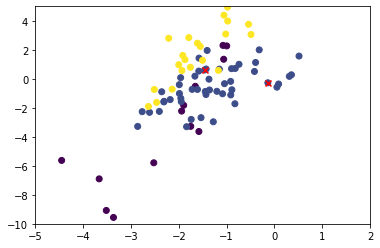

In [67]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

# ch7 e o documento mais parecido estão marcados com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_ids)
plt.scatter(Xpca[[ch7_id,sim_ch7_id],0],Xpca[[ch7_id,sim_ch7_id],1],marker='x',color='r') #ch7_id=62; sim_ch7_id=22